In [1]:
#!/usr/bin/env python3
"""
Script for sentiment analysis

Author: Brian Miller (DU ID: 873601817)
Date: 03/11/2022
"""
import pandas as pd
import helper_functions_sa as helper
from IPython.display import display
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
## Load Input Data ##
yelp_reviews_BD = pd.read_pickle('BD_yelp_reviews.pickle')
yelp_reviews_VD = pd.read_pickle('VD_yelp_reviews.pickle')

# make sure that the date is the index
yelp_reviews_BD = yelp_reviews_BD.set_index('date')
yelp_reviews_VD = yelp_reviews_VD.set_index('date')

# load stopwords from the nltk.corpus
my_file = open("stopwords_eng.txt", "r")
stop_words = my_file.read().splitlines()

In [3]:
## Subset to Only English Reviews ##
yelp_reviews_BD = yelp_reviews_BD[yelp_reviews_BD['language'] == 'en']
yelp_reviews_VD = yelp_reviews_VD[yelp_reviews_VD['language'] == 'en']
# drops 11 of 6,081 reviews, for blue star donuts
# drops 19 of 11,274 reviews, for voodoo donuts

Blue Star Donuts:


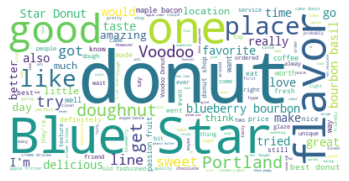

Voodoo Donuts:


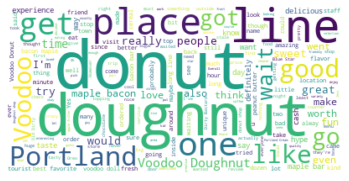

In [4]:
## Generate Wordclouds of Most Common Words ##
full_text_BD = ' '.join(yelp_reviews_BD['text'])
full_text_VD = ' '.join(yelp_reviews_VD['text'])

# blue star donuts
wordcloud_figure = helper.generate_wordcloud(full_text_BD, stop_words)
print("Blue Star Donuts:")
wordcloud_figure.show()

# voodoo donuts
wordcloud_figure = helper.generate_wordcloud(full_text_VD, stop_words)
print("Voodoo Donuts:")
wordcloud_figure.show()

array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

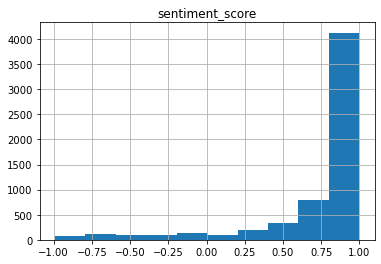

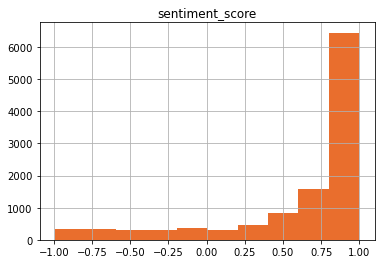

In [5]:
## Calculate sentiment score information for each review ##
analyzer = SentimentIntensityAnalyzer()
yelp_reviews_BD['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in yelp_reviews_BD['text']]
yelp_reviews_VD['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in yelp_reviews_VD['text']]
# compound (-1 to 1): -1 is the most negative, 1 is the most positive, 0 is neutral

# display the distributions
yelp_reviews_BD.hist(column='sentiment_score')
yelp_reviews_VD.hist(column='sentiment_score', color = '#E96E2D')

In [6]:
## Filter The Reviews into positive/negative using the star score and the sentiment score ##

# good reviews
yelp_reviews_BD_good = yelp_reviews_BD[(yelp_reviews_BD['stars'] > 3) & (yelp_reviews_BD['sentiment_score'] > 0.75)]
yelp_reviews_VD_good = yelp_reviews_VD[(yelp_reviews_VD['stars'] > 3) & (yelp_reviews_VD['sentiment_score'] > 0.75)]

# bad reviews
yelp_reviews_BD_bad = yelp_reviews_BD[(yelp_reviews_BD['stars'] < 3) & (yelp_reviews_BD['sentiment_score'] < 0.75)]
yelp_reviews_VD_bad = yelp_reviews_VD[(yelp_reviews_VD['stars'] < 3) & (yelp_reviews_VD['sentiment_score'] < 0.75)]

# print the results
print("Number of Positive Voodoo Donuts Reviews: {}".format(yelp_reviews_VD_good.shape[0]))
print("Number of Negative Voodoo Donuts Reviews: {}".format(yelp_reviews_VD_bad.shape[0]))
print("Number of Positive Blue Star Donuts Reviews: {}".format(yelp_reviews_BD_good.shape[0]))
print("Number of Negative Blue Star Donuts Reviews: {}".format(yelp_reviews_BD_bad.shape[0]))

Number of Positive Voodoo Donuts Reviews: 4749
Number of Negative Voodoo Donuts Reviews: 1421
Number of Positive Blue Star Donuts Reviews: 3682
Number of Negative Blue Star Donuts Reviews: 464


In [7]:
## Get top 10 bigrams for positive/negative reviews##

# calculate bigrams
BD_bigrams_good = helper.compute_n_bigrams(yelp_reviews_BD_good, stop_words, n_bigrams= 10)
BD_bigrams_bad = helper.compute_n_bigrams(yelp_reviews_BD_bad, stop_words, n_bigrams= 10)

VD_bigrams_good = helper.compute_n_bigrams(yelp_reviews_VD_good, stop_words, n_bigrams= 10)
VD_bigrams_bad = helper.compute_n_bigrams(yelp_reviews_VD_bad, stop_words, n_bigrams= 10)

# display results
print("Blue Star Donuts (Positive):")
display(BD_bigrams_good)
print("Blue Star Donuts (Negative):")
display(BD_bigrams_bad)
print("Voodoo Donuts (Positive):")
display(VD_bigrams_good)
print("Voodoo Donuts (Negative):")
display(VD_bigrams_bad)

Blue Star Donuts (Positive):


,bigram,freq
9262,blue star,2359
9307,blueberry bourbon,794
9775,bourbon basil,722
82726,star donuts,639
65432,passion fruit,479
56294,maple bacon,451
62205,old fashioned,355
95827,voodoo donuts,350
7941,best donuts,346
18792,creme brulee,257


Blue Star Donuts (Negative):


,bigram,freq
1266,blue star,122
7400,maple bacon,34
3030,donut shop,31
10961,star donuts,29
2417,customer service,26
578,apple fritter,23
8066,nothing special,23
3244,donuts good,22
1271,blueberry bourbon,21
1342,bourbon basil,19


Voodoo Donuts (Positive):


,bigram,freq
80112,maple bacon,834
9297,bacon maple,649
80115,maple bar,646
135430,voodoo doughnut,625
135422,voodoo doll,611
135431,voodoo doughnuts,510
94701,peanut butter,508
9082,bacon bar,343
135427,voodoo donuts,315
32723,dirty bastard,304


Voodoo Donuts (Negative):


,bigram,freq
3371,blue star,133
33502,tourist trap,107
20344,maple bacon,81
35514,wait line,79
35253,voodoo doughnuts,78
6714,customer service,74
19452,long line,71
35252,voodoo doughnut,71
22245,nothing special,70
20345,maple bar,64


In [8]:
## Gather the full text (one string) for the reviews ##
BD_full_text_good = ' '.join(yelp_reviews_BD_good['text'])
BD_full_text_bad = ' '.join(yelp_reviews_BD_bad['text'])
VD_full_text_good = ' '.join(yelp_reviews_VD_good['text'])
VD_full_text_bad = ' '.join(yelp_reviews_VD_bad['text'])

In [9]:
## Perform word predictions ##
print("Voodoo Donuts (positive):")
helper.extract_related_words(VD_full_text_good, target_word = ['flavor'], n_results = 10, stopwords = stop_words)

print("\nVoodoo Donuts (negative):")
helper.extract_related_words(VD_full_text_bad, target_word = ['line','wait'], n_results = 10, stopwords = stop_words)

print("\nBlue Star Donuts (positive):")
helper.extract_related_words(BD_full_text_good, target_word = ['flavor'], n_results = 10, stopwords = stop_words)

print("\nBlue Star Donuts (negative):")
helper.extract_related_words(BD_full_text_bad, target_word = ['line','wait'], n_results = 10, stopwords = stop_words)

Voodoo Donuts (positve):
Target Word(s): ['flavor']
Related Words: ['flavor', 'grape', 'texture', 'flavors', 'salty', 'candy', 'toppings', 'taste', 'ape', 'combinations']

Voodoo Donuts (negative):
Target Word(s): ['line', 'wait']
Related Words: ['outside', 'see', 'gigggle', 'protest', 'want', 'stand', 'service', 'lines', 'minutes', 'disorganized']

Blue Star Donuts (positive):
Target Word(s): ['flavor']
Related Words: ['unique', 'combinations', 'texture', 'strong', 'interesting', 'glaze', 'taste', 'subtle', 'overly', 'combination']

Blue Star Donuts (negative):
Target Word(s): ['line', 'wait']
Related Words: ['rival', 'zoroastrianism', 'joked', 'commoners', 'potted', 'flaw', 'usually', 'ol', 'counted', 'connected']
